**DATA VISUALIZATION**

---

---













*   **Import of libraries**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



*   **Import of Data**



In [ ]:
df = pd.read_excel('/content/test.xlsx')



*   **Concise Summary of The Dataframe**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            199 non-null    object 
 1   is_holiday           199 non-null    object 
 2   air_pollution_index  199 non-null    int64  
 3   humidity             199 non-null    int64  
 4   wind_speed           199 non-null    int64  
 5   wind_direction       199 non-null    int64  
 6   visibility_in_miles  199 non-null    int64  
 7   dew_point            199 non-null    int64  
 8   temperature          199 non-null    float64
 9   rain_p_h             199 non-null    int64  
 10  snow_p_h             199 non-null    int64  
 11  clouds_all           199 non-null    int64  
 12  weather_type         199 non-null    object 
 13  weather_description  199 non-null    object 
dtypes: float64(1), int64(9), object(4)
memory usage: 21.9+ KB




*   **Dataframe Content Display**




In [ ]:
df

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,18-05-2017 00:00,None,73,63,1,27,4,4,285.15,0,0,90,Rain,moderate rain
1,18-05-2017 00:00,None,251,63,1,27,4,4,285.15,0,0,90,Mist,mist
2,18-05-2017 00:00,None,75,56,1,0,1,1,285.15,0,0,90,Drizzle,light intensity drizzle
3,18-05-2017 01:00,None,98,56,1,351,2,2,284.79,0,0,90,Rain,heavy intensity rain
4,18-05-2017 01:00,None,283,56,1,351,1,1,284.79,0,0,90,Mist,mist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,23-05-2017 01:00,None,202,61,2,163,2,2,283.60,0,0,1,Rain,light rain
195,23-05-2017 02:00,None,65,61,2,163,7,7,283.16,0,0,40,Rain,moderate rain
196,23-05-2017 02:00,None,293,60,1,164,1,1,283.16,0,0,40,Drizzle,drizzle
197,23-05-2017 03:00,None,160,60,1,164,6,6,282.78,0,0,40,Rain,moderate rain




*   **Get The First n Rows**



In [ ]:
df.head(n=5)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,18-05-2017 00:00,None,73,63,1,27,4,4,285.15,0,0,90,Rain,moderate rain
1,18-05-2017 00:00,None,251,63,1,27,4,4,285.15,0,0,90,Mist,mist
2,18-05-2017 00:00,None,75,56,1,0,1,1,285.15,0,0,90,Drizzle,light intensity drizzle
3,18-05-2017 01:00,None,98,56,1,351,2,2,284.79,0,0,90,Rain,heavy intensity rain
4,18-05-2017 01:00,None,283,56,1,351,1,1,284.79,0,0,90,Mist,mist



*   **Compute pairwise correlation of columns, excluding NA/null values**



In [ ]:
df.corr()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
air_pollution_index,1.000000,0.031355,0.076921,0.052794,0.056436,0.056436,-0.035650,NaN,NaN,-0.084871
humidity,0.031355,1.000000,-0.210345,0.352788,0.121548,0.121548,0.015369,NaN,NaN,0.083711
wind_speed,0.076921,-0.210345,1.000000,-0.016774,0.014510,0.014510,-0.354410,NaN,NaN,0.267661
wind_direction,0.052794,0.352788,-0.016774,1.000000,0.117229,0.117229,-0.262379,NaN,NaN,0.027072
visibility_in_miles,0.056436,0.121548,0.014510,0.117229,1.000000,1.000000,-0.119840,NaN,NaN,0.039503
dew_point,0.056436,0.121548,0.014510,0.117229,1.000000,1.000000,-0.119840,NaN,NaN,0.039503
temperature,-0.035650,0.015369,-0.354410,-0.262379,-0.119840,-0.119840,1.000000,NaN,NaN,-0.347910
rain_p_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snow_p_h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clouds_all,-0.084871,0.083711,0.267661,0.027072,0.039503,0.039503,-0.347910,NaN,NaN,1.000000


*   **Identification of correlational relationships  between two numeric variables "humidity" and "temperature"**

In [ ]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha) of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

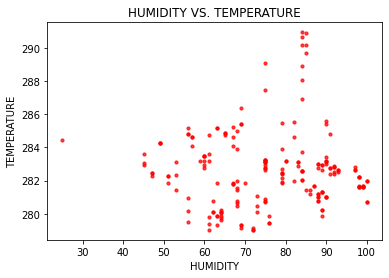

In [ ]:
scatterplot(df.humidity , df.temperature , "HUMIDITY" ,"TEMPERATURE","HUMIDITY VS. TEMPERATURE",color="r",yscale_log=False)

*   **Compute a simple cross tabulation of two factors**

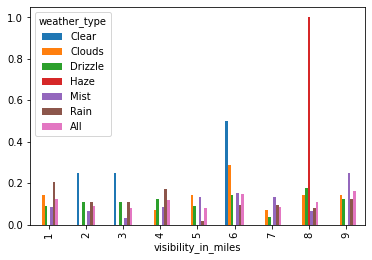

In [ ]:
B=pd.crosstab(df.visibility_in_miles,df.weather_type,margins=True , normalize='columns')
B.plot.bar()

*   **Compute a simple cross tabulation of two factors group by weather_type**

In [ ]:
B=pd.crosstab(df.visibility_in_miles,df.weather_type,margins=True , normalize='columns')
A=df.groupby('weather_type').describe()
print(A)

             air_pollution_index                                               \
                           count        mean        std    min     25%    50%   
weather_type                                                                    
Clear                        4.0  174.750000  59.112181  108.0  153.00  169.5   
Clouds                      14.0  164.714286  99.575583   12.0   73.00  185.0   
Drizzle                     56.0  147.464286  79.734780   10.0   83.00  135.5   
Haze                         1.0  217.000000        NaN  217.0  217.00  217.0   
Mist                        60.0  140.800000  87.461139   11.0   55.25  121.0   
Rain                        64.0  167.875000  81.138623   20.0  113.75  164.5   

                            humidity             ... snow_p_h      clouds_all  \
                 75%    max    count       mean  ...      75%  max      count   
weather_type                                     ...                            
Clear         191.25  252.0

*  **Flexibly plot a univariate distribution of observations**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


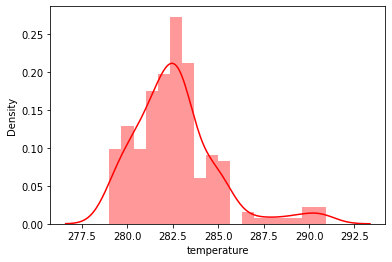

In [ ]:
sns.distplot(df['temperature'],color='r')

*   **Draw a plot of two variables with bivariate and univariate graphs (kind="Hexagon")**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


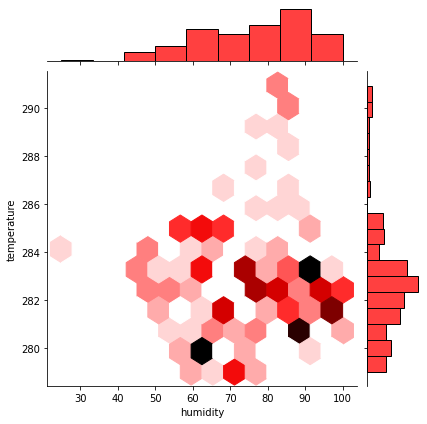

In [ ]:
sns.jointplot(df['humidity'], df['temperature'], kind="hex",color='r')

*   **Draw a plot of two variables with bivariate and univariate graphs (kind="Kernel Density Estimation")**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


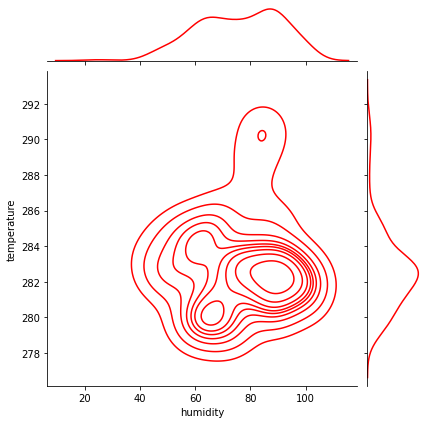

In [ ]:
sns.jointplot(df['humidity'], df['temperature'], kind="kde",color='r')

*   **Draw a scatter plot based on the category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


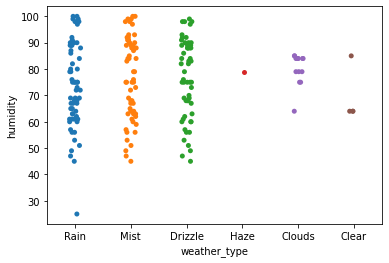

In [ ]:
sns.stripplot(df['weather_type'], df['humidity'])

*   **Remove some character columns which may disrupt our regression model**

In [ ]:
df.drop(['date_time',	'is_holiday','weather_type','weather_description'], axis = 1, inplace = True)

*   **Statistical summary of our data**

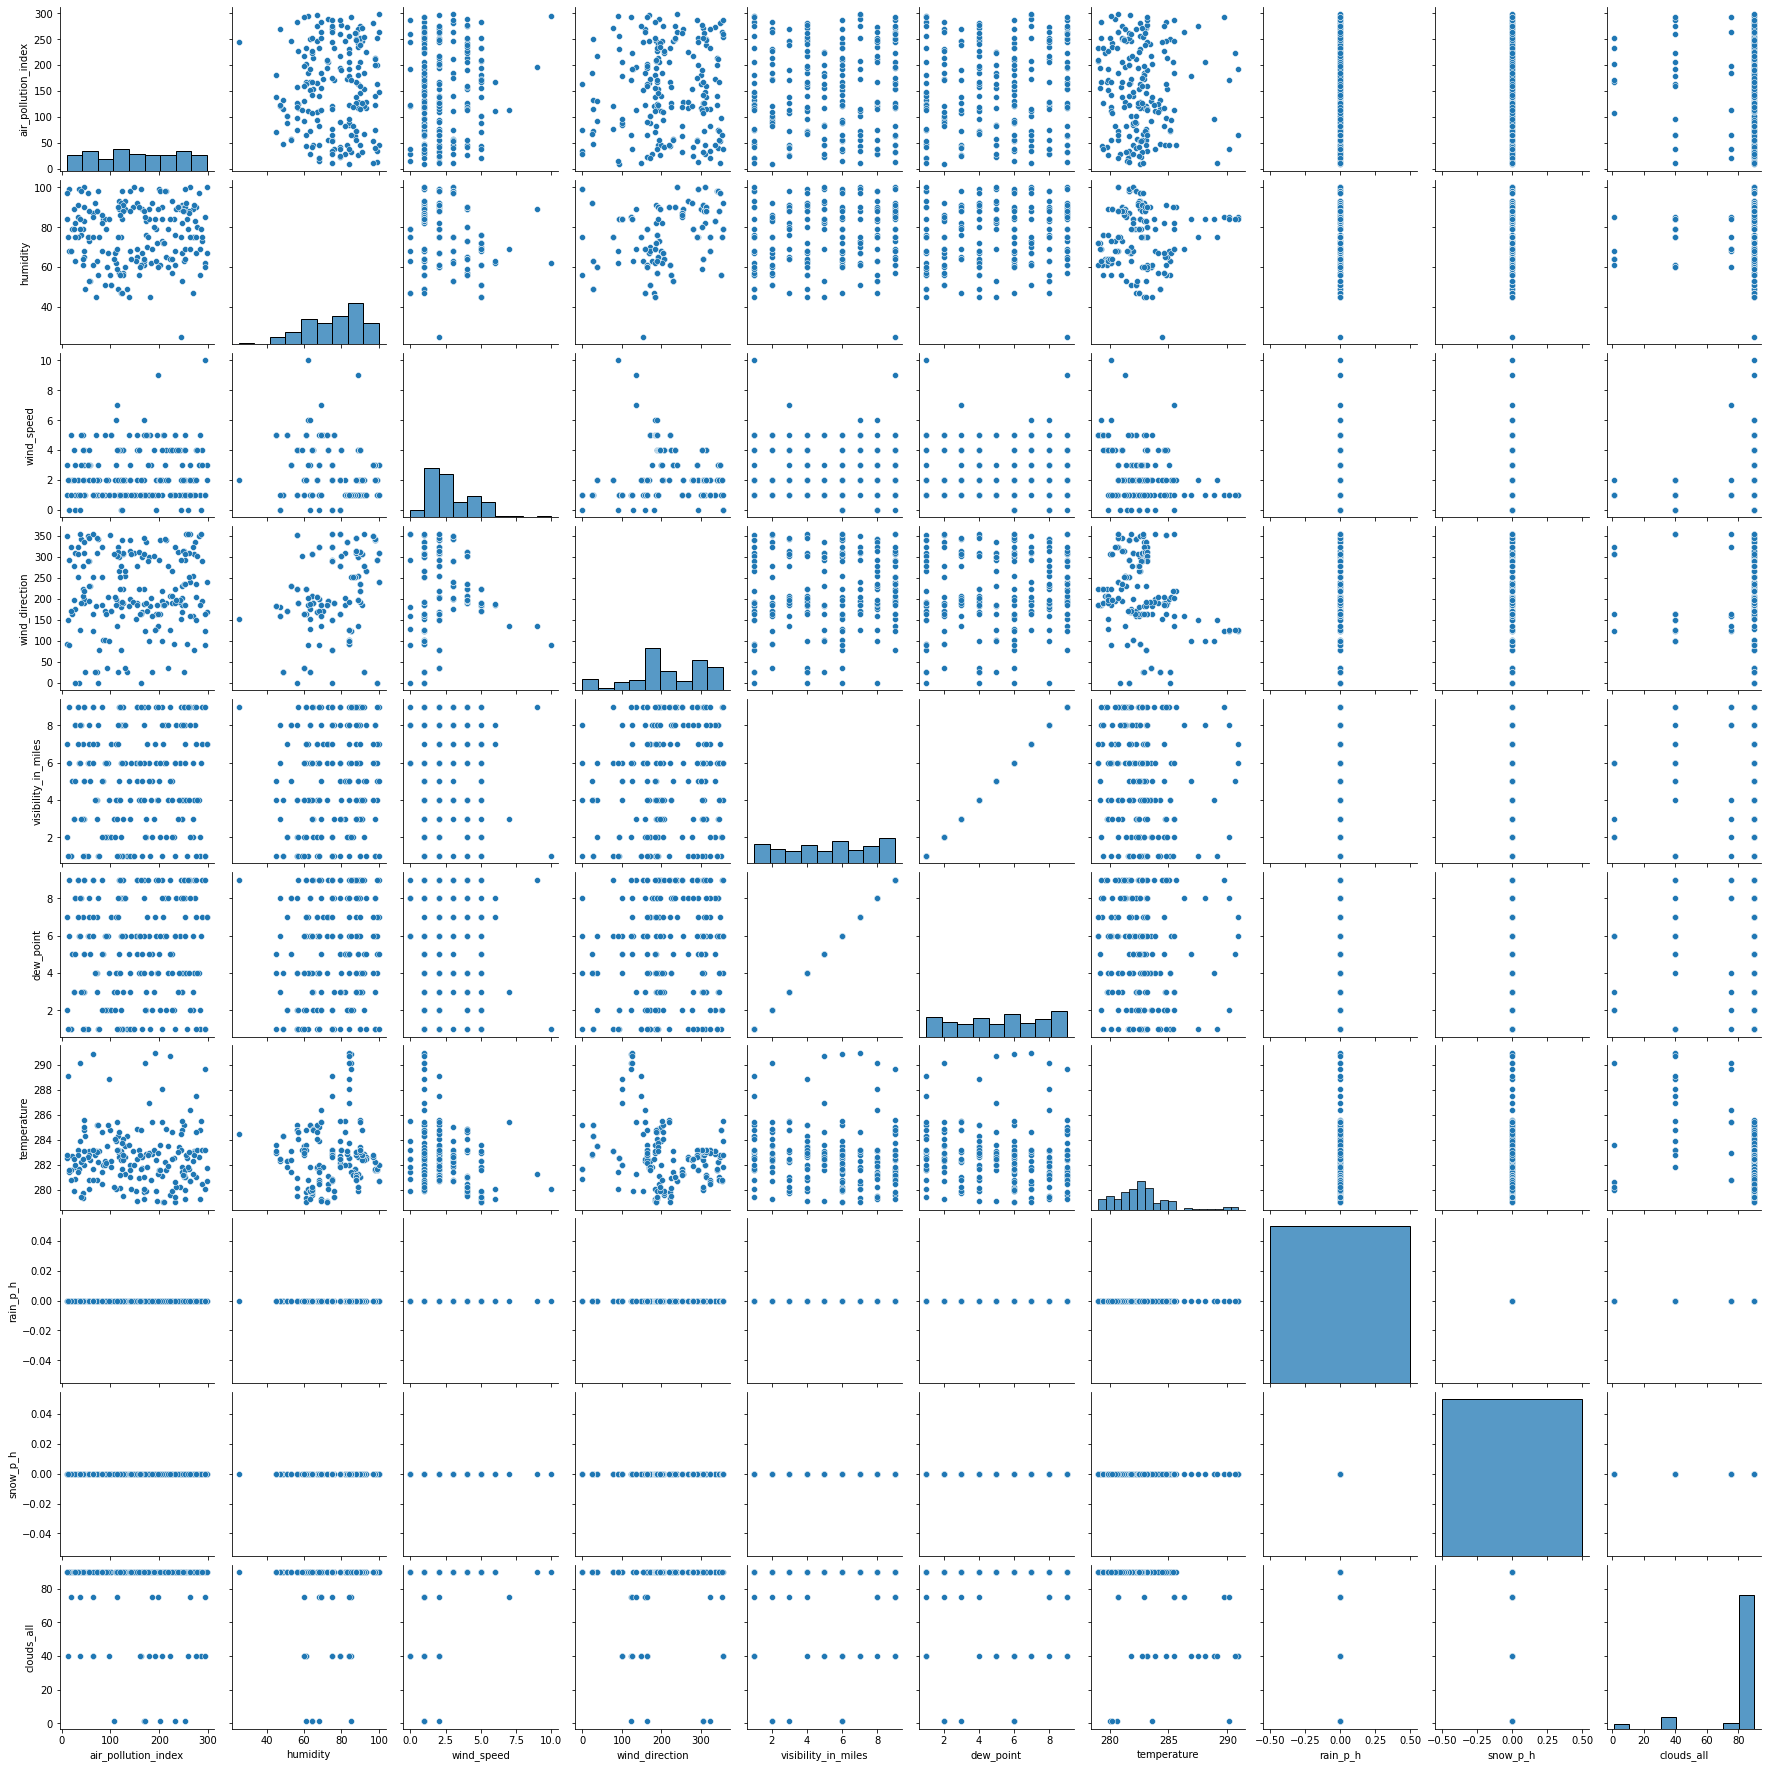

In [ ]:
sns.pairplot(df)



*   **Setting the values for independent (X) variable and dependent (Y) variable**



In [ ]:
x=df[['air_pollution_index',	'humidity',	'wind_speed',	'wind_direction',	'visibility_in_miles',	'dew_point',	'rain_p_h',	'snow_p_h',	'clouds_all']]
y=df['temperature']

*   **Split the dataset into train and test set**

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

*   **Implement the linear model**

In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

*   **Model Equation**

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  287.0451348894623
Coefficients:


[('air_pollution_index', -0.001335224428415425),
 ('humidity', 0.012474851844213226),
 ('wind_speed', -0.5009508162030524),
 ('wind_direction', -0.007055979107282836),
 ('visibility_in_miles', -0.01662286733024151),
 ('dew_point', -0.016622867330241296),
 ('rain_p_h', 0.0),
 ('snow_p_h', 0.0),
 ('clouds_all', -0.026481045576360905)]

*   **Prediction on the test set**

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [282.94401291 281.9982293  282.4193325  282.06971888 282.99721866
 281.67874572 281.40538724 281.45488554 281.43919749 282.93002673
 282.34122716 281.89561988 285.56473219 282.58617389 282.03835402
 284.27532307 284.07797961 281.20865557 282.26387126 281.07672122
 283.38279402 284.65558982 284.47272776 281.61851794 279.74873725
 282.8305729  282.32006341 281.34636287 283.99051774 282.59917992
 281.34951222 283.39058532 281.78117729 281.9507679  283.06736411
 283.46481231 281.83537524 282.40973938 282.1211247  281.26299239
 285.29410251 281.60227126 283.09987163 284.46649676 284.37081569
 281.55976148 279.3649336  283.76827189 281.15228951 285.29138678
 282.28322406 282.54371647 281.64332694 282.26723928 282.83642279
 284.28816993 284.21632084 281.96611268 281.95141164 281.91485171]


*   **Actual values and the predicted values**

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,283.22,282.944013
104,281.62,281.998229
99,281.28,282.419332
92,280.69,282.069719
111,281.95,282.997219


*   **Evaluating the Model**

In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 26.29
Mean Absolute Error: 1.3547021742177425
Mean Square Error: 2.926907460054538
Root Mean Square Error: 1.710820697809837


*   **CONCLUSION**

The Multiple Linear Regression model performs 26.29% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.